# DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/datasets_596958_1073629_Placement_Data_Full_Class.csv')

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['gender']=le.fit_transform(data['gender'])

In [ ]:
data['ssc_b']=le.fit_transform(data['ssc_b'])

In [ ]:
data['hsc_b']=le.fit_transform(data['hsc_b'])

In [ ]:
data['hsc_s']=le.fit_transform(data['hsc_s'])

In [ ]:
data['degree_t']=le.fit_transform(data['degree_t'])

In [ ]:
data['workex']=le.fit_transform(data['workex'])

In [ ]:
data['specialisation']=le.fit_transform(data['specialisation'])

In [ ]:
data['status']=le.fit_transform(data['status'])

In [ ]:
x = data.drop(['salary','status'],axis=1)
x

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [ ]:
y = data['status']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])],remainder='passthrough')
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('encode',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [0])],
                  verbose=False)

In [ ]:
x=ct.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# **CLASSIFICATION**

# LINERAR CLASSIFICATION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
l_cla = LogisticRegression()

In [ ]:
l_cla.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
l_pred = l_cla.predict(x_test)
l_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [ ]:
l_a = accuracy_score(y_test,l_pred)
l_a

0.9302325581395349

In [ ]:
l_r2 = r2_score(y_test,l_pred)
l_r2

0.701388888888889

In [ ]:
l_cmat = confusion_matrix(y_test,l_pred)
l_cmat

array([[13,  3],
       [ 0, 27]])

# K-NEAREST NEIGHBORS CLASSIFICATION

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
k_cla = KNeighborsClassifier()

In [ ]:
k_cla.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
k_pred = k_cla.predict(x_test)
k_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
k_a = accuracy_score(y_test,k_pred)
k_a

0.7441860465116279

In [ ]:
k_r2 = r2_score(y_test,k_pred)
k_r2

-0.09490740740740722

In [ ]:
k_cmat = confusion_matrix(y_test,k_pred)
k_cmat

array([[ 9,  7],
       [ 4, 23]])

# DECISION TREE CLASSIFICATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
d_cla = DecisionTreeClassifier()

In [ ]:
d_cla.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
d_pred = d_cla.predict(x_test)
d_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
d_a = accuracy_score(y_test,d_pred)
d_a

0.7441860465116279

In [ ]:
d_r2 = r2_score(y_test,d_pred)
d_r2

-0.09490740740740722

In [ ]:
d_cmat = confusion_matrix(y_test,d_pred)
d_cmat

array([[10,  6],
       [ 5, 22]])

# RANDOM FOREST CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
r_cla = RandomForestClassifier()

In [ ]:
r_cla.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
r_pred = r_cla.predict(x_test)
r_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
r_a = accuracy_score(y_test,r_pred)
r_a

0.7906976744186046

In [ ]:
r_r2 = r2_score(y_test,r_pred)
r_r2

0.10416666666666685

In [ ]:
r_cmat = confusion_matrix(y_test,r_pred)
r_cmat

array([[ 8,  8],
       [ 1, 26]])

# SUPPORT VECTOR CLASSIFICATION(SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
s_lin = SVC(kernel='linear')
s_rbf = SVC(kernel='rbf')

In [ ]:
s_lin.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
s_rbf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
s_lin_pred = s_lin.predict(x_test)
s_lin_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
s_rbf_pred = s_rbf.predict(x_test)
s_rbf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
s_lin_a = accuracy_score(y_test,s_lin_pred)
s_rbf_a = accuracy_score(y_test,s_rbf_pred)

In [ ]:
s_lin_a

0.9534883720930233

In [ ]:
s_rbf_a

0.7441860465116279

In [ ]:
s_lin_r2 = r2_score(y_test,s_lin_pred)
s_lin_r2

0.8009259259259259

In [ ]:
s_rbf_r2 = r2_score(y_test,s_rbf_pred)
s_rbf_r2

-0.09490740740740722

In [ ]:
s_lin_cmat = confusion_matrix(y_test,s_lin_pred)
s_lin_cmat

array([[14,  2],
       [ 0, 27]])

In [ ]:
s_rbf_cmat = confusion_matrix(y_test,s_rbf_pred)
s_rbf_cmat

array([[ 5, 11],
       [ 0, 27]])

# COMPARING CLASSIFICATION

In [ ]:
accuracy = []
accuracy.append(l_a)
accuracy.append(k_a)
accuracy.append(d_a)
accuracy.append(r_a)
accuracy.append(s_lin_a)
accuracy.append(s_rbf_a)

In [ ]:
accuracy

[0.9302325581395349,
 0.7441860465116279,
 0.7441860465116279,
 0.7906976744186046,
 0.9534883720930233,
 0.7441860465116279]

In [ ]:
titles=['L_CLA','KNN_CLA','DECISION_CLA','RANDON_CLA','SVC(LIN)','SVC(RBF)']

In [ ]:
titles

['L_CLA', 'KNN_CLA', 'DECISION_CLA', 'RANDON_CLA', 'SVC(LIN)', 'SVC(RBF)']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Seaborn is a Python data visualization library based on matplotlib.Here we are using barplot attribute of seaborn to visualize the accuracy we got from the different classification algorithms.We are plotting accuracy along y-axis and titles along x-axis.we are labeling x axis as classifiers and y axis as accuracy.xticks and yticks are used to get current tick location ie:scaling marks.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

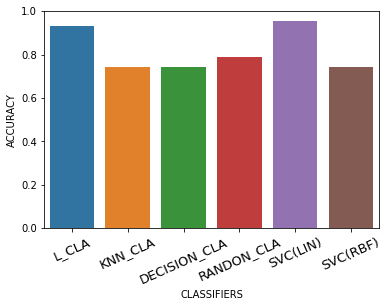

In [ ]:
sns.barplot(x=titles,y=accuracy)
plt.xlabel('CLASSIFIERS')
plt.ylabel('ACCURACY')
plt.xticks(fontsize=13,horizontalalignment='center',rotation=24)
plt.yticks(fontsize=10)

# CONCLUSION

Therefore,we are selecting support vector classification(kernel=linear),Which gives us the highest accuracy.And the same classification algorithm is used to train the datasets.